Found 19762 files belonging to 10 classes.
Using 15810 files for training.
Found 19762 files belonging to 10 classes.
Using 3952 files for validation.
Classes: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']


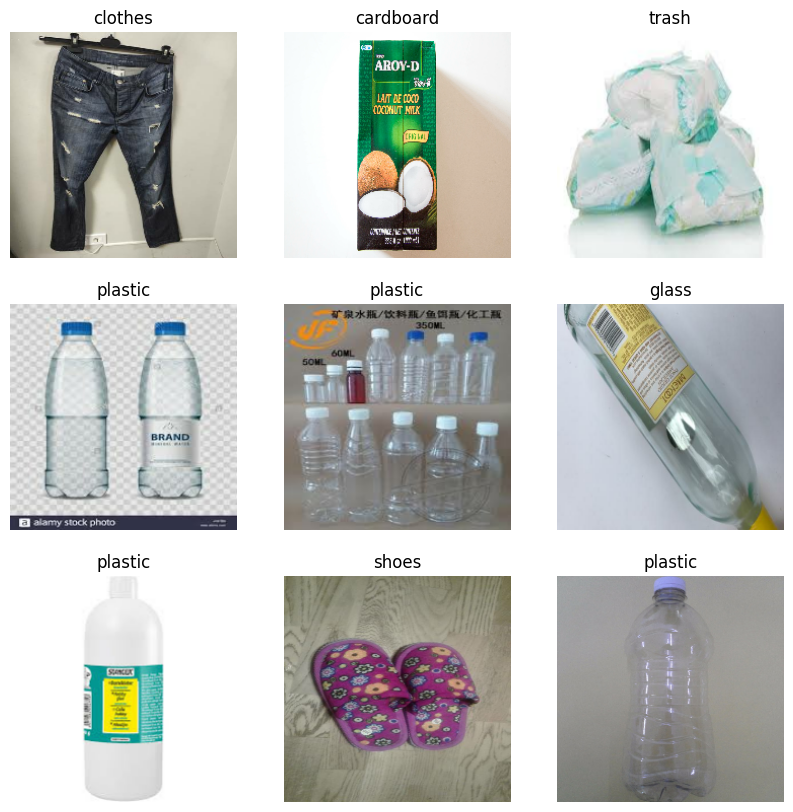

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 405s 772ms/step - accuracy: 0.4655 - loss: 1.5717 - val_accuracy: 0.6073 - val_loss: 1.1922
Epoch 2/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 409s 826ms/step - accuracy: 0.6425 - loss: 1.0620 - val_accuracy: 0.6364 - val_loss: 1.0706
Epoch 3/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 397s 802ms/step - accuracy: 0.7290 - loss: 0.8101 - val_accuracy: 0.6756 - val_loss: 0.9988
Epoch 4/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 371s 749ms/step - accuracy: 0.8148 - loss: 0.5590 - val_accuracy: 0.7047 - val_loss: 1.0190
Epoch 5/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 367s 742ms/step - accuracy: 0.8865 - loss: 0.3439 - val_accuracy: 0.6898 - val_loss: 1.2065
Epoch 6/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 477s 963ms/step - accuracy: 0.9301 - loss: 0.2145 - val_accuracy: 0.6921 - val_loss: 1.3774
Epoch 7/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 367s 740ms/step - accuracy: 0.9559 - loss: 0.1380 - val_accuracy: 0.6991 - val_loss: 1.5497
Epoch 8/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 366s 739ms/step - accuracy: 0.9717 -

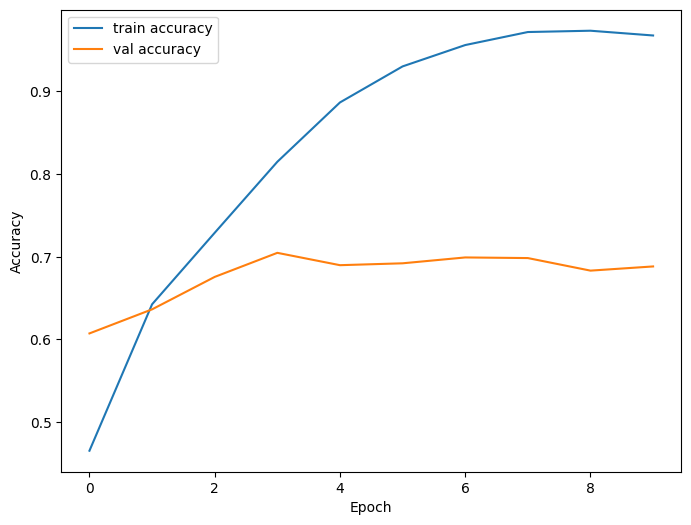

In [1]:
# sustainability_cnn.ipynb

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models # pyright: ignore[reportMissingImports]
import matplotlib.pyplot as plt

# Define dataset directory and parameters
data_dir = '../data/garbage-dataset'  # Adjust path if needed
img_size = (224, 224)
batch_size = 32

# Load training and validation datasets with 80-20 split
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

# Get class names
class_names = train_ds.class_names
print("Classes:", class_names)

# Visualize some sample images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# Normalize pixel values to [0,1]
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=img_size + (3,)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Plot training and validation accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [4]:
model.save('models/sustainability_cnn_model.h5')

